## Capstone I:  NHANES 2015-2016 Data Wrangling

Our objective is to identify ways to reduce hospital readmission rates related to cardiovascular disease in adults. 

The first step in completing this project is data collection and cleaning. The following are the steps that were taken.

1. Downloaded the datasets of interest from the Centers for Disease Control and Prevention website: https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015.


2. Imported pandas and numpy into the Python notebook, read the SAS files into pandas dataframes, and merged the datasets of interest.


3. Examined the data
    - Noted shape and size of dataset.
    - Made the dataset smaller by creating a new dataset only containing columns of main interest.
    - Noted column names and edited to make more user-friendly.
    - Noted data types within the different columns, and edited when needed.
    - Examined null values and outliers by observing data summaries and creating boxplots and histograms.
        - Null values: Many of the columns contained null values ('NaN'). We kept these values in the dataset, because not all questions in the questionnaires and all laboratory values were taken from all participants. Numerical values that were similar to null (i.e., where response was 'refused' or 'don't know', were replaced with 'NaN'. Categorical variables (represented in the dataset by numbers) with the responses 'refused' and 'don't know' were left alone for now.
        - Outliers:  Since the dataset is relatively small in regard to participants who have had >1 overnight hospital stay in the last year, and also in regard to participants with cardiovascular disease, we left all other outliers in the dataset.


### Importing pandas library (for data manipulation and analysis), as well as numpy and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We imported the SAS data files into pandas dataframes, then merged the dataframes together.


In [2]:

acq = pd.read_sas('NHANES/ACQ_I_acculturation.XPT')
bmx = pd.read_sas('NHANES/BMX_I_body_measures.xpt')
demo = pd.read_sas('NHANES/DEMO_I_demographics.XPT')
diq = pd.read_sas('NHANES/DIQ_I_diabetes.xpt')
dpq = pd.read_sas('NHANES/DPQ_I_depression.xpt')
dxx = pd.read_sas('NHANES/DXX_I_dexa.xpt')
fsq = pd.read_sas('NHANES/FSQ_I_food_security.xpt')
huq = pd.read_sas('NHANES/HUQ_I_hospitalization.XPT')
hiq = pd.read_sas('NHANES/HIQ_I_health_insurance.xpt')
mcq = pd.read_sas('NHANES/MCQ_I_medical_conditions.XPT')
glu = pd.read_sas('NHANES/GLU_I_glucose.XPT')
hdl = pd.read_sas('NHANES/HDL_I_hdl.XPT')
ldltg = pd.read_sas('NHANES/TRIGLY_I_ldl_tg.XPT')
tc = pd.read_sas('NHANES/TCHOL_I_tc.XPT')
hgba1c = pd.read_sas('NHANES/GHB_I_hgba1c.XPT')


#Merging the 15 dataframes together into one large dataframe
nhanes = acq.merge(bmx, on='SEQN', how='outer') \
.merge(demo, on='SEQN', how='outer') \
.merge(diq, on='SEQN', how='outer').merge(dpq, on='SEQN', how ='outer') \
.merge(dxx, on='SEQN', how='outer').merge(fsq, on='SEQN', how='outer') \
.merge(huq, on='SEQN', how='outer').merge(hiq, on='SEQN', how='outer') \
.merge(mcq, on='SEQN', how='outer').merge(glu, on='SEQN', how='outer')\
.merge(hdl, on='SEQN', how='outer').merge(ldltg, on='SEQN', how='outer')\
.merge(tc, on='SEQN', how='outer').merge(hgba1c, on='SEQN', how='outer')


#### After careful examination of the data and based on our knowledge/experience in public health, social sciences, and patient care,  we decided that we will explore the following features in the dataframe. The variable names for each feature (enclosed in quotation) will be the finalized name of said variable. Original variable names set by NHANES are in capital letters.

'seqn' = SEQN = study participant ID

'gender' = RIAGENDR = participant's gender: 1=Male, 2=Female, NaN = Missing

'age' = RIDAGEYR = Current age of participant: Range of values = 0-79 years, 80=80 years and older, NaN = Missing

'ethnicity' = RIDRETH3 = Race/Ethnicity:
    1=Mexican American, 2=Other Hispanic, 3=Non-Hispanic White, 4=Non-Hispanic Black, 6=Non-Hispanic Asian,
    7=Other race, including multi-racial, NaN = Missing

'lang_hisp' = ACD040 = Language(s) spoken at home Hispanics:
    1= Spanish only, 2=More spanish than English, 3= Both equally, 4=More English than Spanish
    5= Only English, 7= Refused, 9=Don't know, NaN = Missing
         
'lang_nhb_nhw' = ACD011A = Language(s) spoken at home (Non-Hispanic white, Non-Hispanic black, or other race including multi-racial):
    1 = English, 77 = Refused, 99 = Don't know, NaN = Missing

lang_asian' = ACD110 = Language(s) spoken at home - Asians: 
   1= Only non-English language, 2=More non-English than English, 3= Both equally, 4=More English than non-English,
   5= Only English, 7= Refused, 9=Don't know, NaN = Missing
        
'bmi' = BMXBMI = Body Mass Index: Range of values = 11.5-67.3, NaN = Missing

'diabetes' = DIQ010 = Have you ever been told by a doctor or health professional that you have diabetes: 
    1=Yes,2=No, 3=Borderline, 7=Refused, 9= Don't know, NaN = Missing

'diabetes_age' = DID040 = At what age were you told you have diabetes? 
    Range of values =  1-79 years, 80 = 80 years and older, 666 = less than 1 year of age, 777 = refused, 999=don't know, 
    NaN = Missing

'prediabetes' = DIQ160 = Ever told you have prediabetes? 1=yes, 2=no, 7=refused, 9=don't know, NaN = Missing

'depr1 - depr10' = DPQ010 - DPQ100 = Depression screening questions from 9-item depression screening instrument, 
    'The Patient Health Questionnaire'. A total score is based on the sum all responses, and Ranges from 0 to 27. 
    Major depression and depression severity can be assessed using pre-defined cut-point references)
    Possible choices for each question: 
    0 = Not at all, 1= several days, 2=more than half the days,3=Nearly every day, 7=Refused, 9=Don't know, NaN = Missing, 
    Sum of DPQ questionnaire >9 indicates lowest levels of depression.

'bodyfatpct' = DXDTOPF = Percent Body Fat: Range of values: 11.7 to 54.7, NaN = Missing

'foodsec' = FSD032B = The food that {I/we} bought just didn't last, and {I/we} didn't have enough money to get more food:
    1= Often True, 2= Sometimes true, 3=Never True, 7=Refused, 9=Don't know, NaN = Missing

'chf' = MCQ160b = 'Have you ever been told you have congestive heart failure: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

'chf_age' = MCQ180b = Age when told you had heart failure: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 

'chd' = MCQ160c = Have you ever been told you had coronary heart disease: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

'chd_age' = MCQ180c = Age of onset of coronary heart disease: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 

'angina' = MCQ160d = Have you ever been told you have angina/angina pectoris: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing 

'angina_age' = MCQ180d = Age of onset of angina/angina pectoris: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


'heartattack' = MCQ160e = Ever told you had a heart attack: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

'heartattack_age' = MCQ180e = Age when told you had a heart attack: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


'stroke' = MCQ160f = Ever told you had a stroke: 1=yes, 2=no, 7=Refused, 9=Don't know, NaN = Missing

'stroke_age' = MCQ180f = Age when told you had a stroke: 
    Range of values = 0-79 years, 80=80 years and older, 77777=Refused, 99999=Don't know, NaN = Missing 


'numhosp' = HUD080 = Number of hospital stays (1 or more nights/stay)in the last year: 
    1=1, 2=2, 3=3, 4=4, 5=5, 6= 6 or greater, 77777=Refused, 99999=Don't know, NaN = Missing

'glucose' = LBXGLU = Fasting plasma glucose(mg/dl): Range of values = 21-479, NaN = Missing

'hdl' = LBDHDD = Fasting Direct HDL cholesterol(mg/dl): Range of values = 6-226, NaN = Missing

'tg' = LBXTR = Fasting triglycerides(mg/dl): Range of values = 14-2141, NaN = Missing

'ldl' = LBDLDL = Fasting LDL cholesterol(mg/dl): Range of values = 23-277, NaN = Missing

'tchol' = LBXTC = Fasting Total Cholesterol(mg/dl): Range of values = 77-545, NaN = Missing

'hgba1c' = LBXGH = Glycated hemoglobin (Hemoglobin A1c) (%): Range of values = 3.8-17, NaN = Missing

#### Next, we select the columns of interest and create an updated (abridged) dataframe.

In [3]:

nhanes = nhanes[['SEQN','RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'ACD040', 'ACD011A', 'ACD110', 'BMXBMI', \
                  'DIQ010', 'DID040', 'DIQ160', 'DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060',\
                  'DPQ070','DPQ080','DPQ090','DPQ100', 'DXDTOPF', 'FSD032B', 'MCQ160B', 'MCQ180B',\
                  'MCQ160C', 'MCQ180C','MCQ160D', 'MCQ180D', 'MCQ160E', 'MCQ180E', 'MCQ160F', 'MCQ180F', 'HUD080',\
                'LBXGLU','LBDHDD','LBXTR', 'LBDLDL','LBXTC', 'LBXGH' ]]

#Confirming pandas dataframe has been created
print(type(nhanes))


<class 'pandas.core.frame.DataFrame'>


In [4]:
nhanes.shape

(9971, 40)

### The dataset has more than 9900 records with 40 features.

In [5]:
# Quick exploration of the dataframe.
print(nhanes.head())
print(nhanes.tail())

      SEQN  RIDAGEYR  RIAGENDR  RIDRETH3  ACD040  ACD011A  ACD110  BMXBMI  \
0  83732.0      62.0       1.0       3.0     NaN      1.0     NaN    27.8   
1  83733.0      53.0       1.0       3.0     NaN      NaN     NaN    30.8   
2  83734.0      78.0       1.0       3.0     NaN      1.0     NaN    28.8   
3  83735.0      56.0       2.0       3.0     NaN      1.0     NaN    42.4   
4  83736.0      42.0       2.0       4.0     NaN      1.0     NaN    20.3   

   DIQ010  DID040  ...  MCQ180E  MCQ160F  MCQ180F  HUD080  LBXGLU  LBDHDD  \
0     1.0    46.0  ...      NaN      2.0      NaN     NaN     NaN    46.0   
1     2.0     NaN  ...      NaN      2.0      NaN     NaN   101.0    63.0   
2     1.0    52.0  ...     58.0      2.0      NaN     NaN    84.0    30.0   
3     2.0     NaN  ...      NaN      2.0      NaN     NaN     NaN    61.0   
4     2.0     NaN  ...      NaN      2.0      NaN     NaN    84.0    53.0   

   LBXTR  LBDLDL  LBXTC  LBXGH  
0    NaN     NaN  173.0    7.0  
1  147.0

In [6]:
#Examining datatypes, column types, non-null values, and memory usage.

nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 40 columns):
SEQN        9971 non-null float64
RIDAGEYR    9971 non-null float64
RIAGENDR    9971 non-null float64
RIDRETH3    9971 non-null float64
ACD040      2882 non-null float64
ACD011A     4964 non-null float64
ACD110      984 non-null float64
BMXBMI      8756 non-null float64
DIQ010      9575 non-null float64
DID040      853 non-null float64
DIQ160      6045 non-null float64
DPQ010      5164 non-null float64
DPQ020      5164 non-null float64
DPQ030      5164 non-null float64
DPQ040      5162 non-null float64
DPQ050      5162 non-null float64
DPQ060      5162 non-null float64
DPQ070      5161 non-null float64
DPQ080      5161 non-null float64
DPQ090      5161 non-null float64
DPQ100      3579 non-null float64
DXDTOPF     4598 non-null float64
FSD032B     9649 non-null float64
MCQ160B     5719 non-null float64
MCQ180B     214 non-null float64
MCQ160C     5719 non-null float64
MCQ180C     

In [7]:
#Renaming the columns of the dataframe, so that it is easier to work with and understand the variables of interest.

nhanes.columns = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetes', 'diabetes_age', 'prediabetes', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']


In [8]:
# Confirming column names have changed.
print(nhanes.columns)

Index(['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw',
       'lang_asian', 'bmi', 'diabetes', 'diabetes_age', 'prediabetes', 'depr1',
       'depr2', 'depr3', 'depr4', 'depr5', 'depr6', 'depr7', 'depr8', 'depr9',
       'depr10', 'bodyfatpct', 'foodsec', 'chf', 'chf_age', 'chd', 'chd_age',
       'angina', 'angina_age', 'heartattack', 'heartattack_age', 'stroke',
       'stroke_age', 'numhosp', 'glucose', 'hdl', 'tg', 'ldl', 'tchol',
       'hgba1c'],
      dtype='object')


### We elect to not remove null values, since all features do not apply to all participants of interest.

### Next, we begin to address data elements that are null, but not coded as 'null'.

#### &emsp;Here we also make adjustments to age columns & depression scores, and typecast categorical variables.

In [9]:
# Replacing values in the questionnaires that had responses of either 'refused'(77777 and 777), or 
#'Don't Know' (99999 and 999) with 'NaN' 
cols = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetes', 'diabetes_age', 'prediabetes', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']

depr = ['depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6', 'depr7', 'depr8', 'depr9', 'depr10']
agecols=['age','diabetes_age','chf_age', 'chd_age','angina_age', 'heartattack_age', 'stroke_age', 'numhosp']
othercols=['lang_hisp','lang_nhb_nhw','lang_asian','diabetes','prediabetes','depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10','foodsec','chf','chd','angina','heartattack','stroke']

# Since some of the participants were infants under 12 months, their ages were calculated as less than 1 year, 
# resulting in exponential values. To fix this, we will round the ages:
nhanes[agecols] = nhanes[agecols].round(decimals=0)

# Rounding up the depression scores for better display
nhanes[depr] = nhanes[depr].round(decimals=0)


#changing 'refused' and 'don't know' responses with NaN
nhanes[agecols]= nhanes[agecols].replace({666:0, 777:np.nan, 999:np.nan, 99999:np.nan, 77777:np.nan})
nhanes[othercols]=nhanes[othercols].replace({7:np.nan, 9:np.nan})
nhanes.numhosp=nhanes.numhosp.replace({99999:np.nan, 77777:np.nan})

#replacing borderline diabetes=yes to diabetes = no
nhanes['diabetes']=nhanes['diabetes'].replace(3,0)

nhanes.gender = nhanes.gender.replace({1:0 , 2:1})
nhanes.ethnicity = nhanes.ethnicity.replace({1:'mexican', 2:'other_hisp', 3: 'white', 4:'black',\
                                            6:'asian', 7:'other_race_or_multiracial'})
nhanes.lang_hisp = nhanes.lang_hisp.replace({1:'spanish_only', 2:'more_span_than_eng', 3:'both_equally', \
                                             4:'more_eng_than_span', 5:'english_only'})
nhanes.lang_asian = nhanes.lang_asian.replace({1:'non-english_only', 2:'more_noneng_than_eng', 3:'both_equally', \
                                             4:'more_eng_than_noneng', 5:'english_only'})


# Setting values of boolean variables ( 0=No, 1=Yes)
nhanes.diabetes = nhanes.diabetes.replace([2],0)
nhanes.prediabetes = nhanes.prediabetes.replace([2],0)
nhanes.chf = nhanes.chf.replace([2],0)
nhanes.chd = nhanes.chd.replace([2],0)
nhanes.angina = nhanes.angina.replace([2],0)
nhanes.heartattack = nhanes.heartattack.replace([2],0)
nhanes.stroke = nhanes.stroke.replace([2],0)

# Typecasting categorical variables.
nhanes.ethnicity = nhanes.ethnicity.astype('category')
nhanes.lang_hisp = nhanes.lang_hisp.astype('category')
nhanes.lang_nhb_nhw = nhanes.lang_nhb_nhw.astype('category')
nhanes.lang_asian = nhanes.lang_asian.astype('category')
nhanes.diabetes = nhanes.diabetes.astype('category')
nhanes.prediabetes = nhanes.prediabetes.astype('category')
nhanes.chf = nhanes.chf.astype('category')
nhanes.chd = nhanes.chd.astype('category')
nhanes.angina = nhanes.angina.astype('category')
nhanes.heartattack = nhanes.heartattack.astype('category')
nhanes.stroke = nhanes.stroke.astype('category')

In [10]:
#Viewing category codes for 'ethnicity' and 'diabetes' variables. 
print(nhanes.ethnicity.cat.codes.head(5))
print('diabetes\n', nhanes.diabetes.cat.codes.head(5))

0    5
1    5
2    5
3    5
4    1
dtype: int8
diabetes
 0    1
1    0
2    1
3    0
4    0
dtype: int8


### Next, we will create two new features/ variables that will be helpful for analysis:

#### &emsp;'depr_score' = depression score (sum of depr1 through depr10)
#### &emsp;'cvd_onset_age' = age of onset of cardiovascular disease, here defined as the earliest onset age out of any of the following variables: 
&emsp;&emsp;&emsp;'cvd_age' ,  'chd_age' ,  'angina_age' ,  'stroke_age' ,  'heartattack_age'


In [11]:
#creating depr_score
nhanes['depr_score'] = nhanes.apply(lambda row: row.depr1+row.depr2+row.depr3+row.depr4+row.depr5+row.depr6+row.depr7+row.depr8+row.depr9+row.depr10, axis=1 )

#confirming 'depr_score' is being calculated properly
print(nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8','depr9','depr10', 'depr_score']].head(25))

    depr1  depr2  depr3  depr4  depr5  depr6  depr7  depr8  depr9  depr10  \
0     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
1     1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
2     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     1.0   
3     1.0    1.0    2.0    2.0    1.0    3.0    2.0    0.0    1.0     0.0   
4     1.0    1.0    1.0    1.0    3.0    0.0    1.0    0.0    0.0     0.0   
5     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     NaN   
6     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
7     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
8     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
9     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
11    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     NaN   

In [12]:
#creating 'cvd_onset_age'
cvd_onset_age=nhanes[['chd_age', 'chf_age', 'stroke_age','angina_age','heartattack_age']].min(axis=1)
nhanes['cvd_onset_age']=cvd_onset_age
pd.options.display.max_rows=300

#confirming 'cvd_onset_age' is being populated correctly
nhanes[['chd_age', 'chf_age', 'stroke_age','angina_age','heartattack_age', 'cvd_onset_age']].head(200)




,chd_age,chf_age,stroke_age,angina_age,heartattack_age,cvd_onset_age
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,58.0,58.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Reordering columns, grouping similar features together.
orderedcols = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'foodsec', \
               'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6', 'depr7', 'depr8', 'depr9', 'depr10', 'depr_score',\
               'diabetes', 'diabetes_age', 'prediabetes', 'chf', 'chf_age', 'chd', 'chd_age', 'angina', 'angina_age', \
               'heartattack', 'heartattack_age','stroke', 'stroke_age', 'cvd_onset_age', 'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c',\
               'bmi', 'bodyfatpct', 'numhosp']

nhanes = nhanes[orderedcols]
nhanes.columns

Index(['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw',
       'lang_asian', 'foodsec', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5',
       'depr6', 'depr7', 'depr8', 'depr9', 'depr10', 'depr_score', 'diabetes',
       'diabetes_age', 'prediabetes', 'chf', 'chf_age', 'chd', 'chd_age',
       'angina', 'angina_age', 'heartattack', 'heartattack_age', 'stroke',
       'stroke_age', 'cvd_onset_age', 'glucose', 'hdl', 'tg', 'ldl', 'tchol',
       'hgba1c', 'bmi', 'bodyfatpct', 'numhosp'],
      dtype='object')

### We now remove participants under the age of 18 from our dataset, since our investigation is focusing on adults.


In [14]:
nhanes = nhanes[nhanes['age'] >= 18]

In [15]:
#Viewing data types and count of non-null elements for selected columns.
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 8990
Data columns (total 42 columns):
seqn               5992 non-null float64
age                5992 non-null float64
gender             5992 non-null float64
ethnicity          5992 non-null category
lang_hisp          1851 non-null category
lang_nhb_nhw       3294 non-null category
lang_asian         723 non-null category
foodsec            5766 non-null float64
depr1              5151 non-null float64
depr2              5161 non-null float64
depr3              5161 non-null float64
depr4              5161 non-null float64
depr5              5158 non-null float64
depr6              5159 non-null float64
depr7              5159 non-null float64
depr8              5158 non-null float64
depr9              5157 non-null float64
depr10             3577 non-null float64
depr_score         3559 non-null float64
diabetes           5988 non-null category
diabetes_age       830 non-null float64
prediabetes        5005 non-n

In [16]:
#Viewing summary of data for each series that is numeric
nhanes.describe()

,seqn,age,gender,foodsec,depr1,depr2,depr3,depr4,depr5,depr6,...,cvd_onset_age,glucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,numhosp
count,5992.000000,5992.000000,5992.000000,5766.000000,5151.000000,5161.000000,5161.000000,5161.000000,5158.000000,5159.000000,...,625.000000,2573.000000,5394.000000,2363.000000,2339.000000,5394.000000,5441.000000,5662.000000,3012.000000,670.000000
mean,88676.950935,48.121996,0.518191,2.628859,0.403611,0.342763,0.612672,0.782407,0.400737,0.244040,...,54.716800,112.764866,54.134779,112.610664,111.394186,189.096218,5.822000,29.382197,32.855644,1.525373
std,2877.819691,18.521353,0.499711,0.628847,0.786277,0.701141,0.928524,0.927262,0.781882,0.632234,...,15.144543,40.589287,17.482290,94.975410,35.831075,41.717568,1.165878,7.095921,8.769377,0.997057
min,83732.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21.000000,6.000000,15.000000,23.000000,77.000000,3.800000,14.500000,11.700000,1.000000
25%,86175.750000,32.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46.000000,95.000000,42.000000,62.000000,85.500000,160.000000,5.300000,24.300000,26.300000,1.000000
50%,88659.500000,48.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,55.000000,102.000000,51.000000,91.000000,109.000000,186.000000,5.500000,28.300000,32.850000,1.000000
75%,91174.250000,63.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,65.000000,113.000000,64.000000,137.000000,133.000000,213.000000,5.900000,33.000000,39.900000,2.000000
max,93702.000000,80.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,80.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000,67.300000,54.700000,6.000000


In [17]:
#was unable to view all columns. To fix this:
pd.set_option('display.max_columns', 50)
print(nhanes.describe())
nhanes.head()

               seqn          age       gender      foodsec        depr1  \
count   5992.000000  5992.000000  5992.000000  5766.000000  5151.000000   
mean   88676.950935    48.121996     0.518191     2.628859     0.403611   
std     2877.819691    18.521353     0.499711     0.628847     0.786277   
min    83732.000000    18.000000     0.000000     1.000000     0.000000   
25%    86175.750000    32.000000     0.000000     2.000000     0.000000   
50%    88659.500000    48.000000     1.000000     3.000000     0.000000   
75%    91174.250000    63.000000     1.000000     3.000000     1.000000   
max    93702.000000    80.000000     1.000000     3.000000     3.000000   

             depr2        depr3        depr4        depr5        depr6  \
count  5161.000000  5161.000000  5161.000000  5158.000000  5159.000000   
mean      0.342763     0.612672     0.782407     0.400737     0.244040   
std       0.701141     0.928524     0.927262     0.781882     0.632234   
min       0.000000     0.000

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,foodsec,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,depr_score,diabetes,diabetes_age,prediabetes,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,cvd_onset_age,glucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,numhosp
0,83732.0,62.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0,27.8,NaN,NaN
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5,30.8,30.0,NaN
2,83734.0,78.0,0.0,white,NaN,1.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,52.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,58.0,0.0,NaN,58.0,84.0,30.0,269.0,145.0,229.0,5.8,28.8,NaN,NaN
3,83735.0,56.0,1.0,white,NaN,1.0,NaN,3.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,13.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6,42.4,50.9,NaN
4,83736.0,42.0,1.0,black,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6,20.3,NaN,NaN


### Next, in order to examine any potential outliers, we create a visualizations for the different features.

#### Visualization of age onset of different conditions.

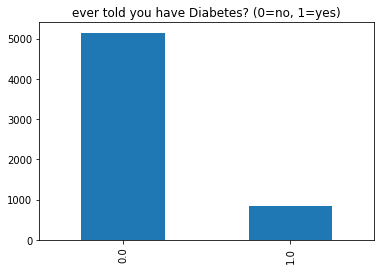

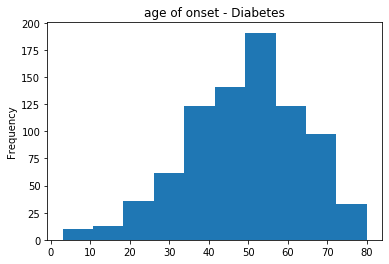

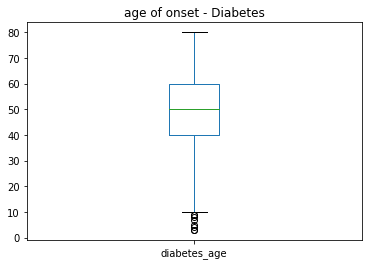

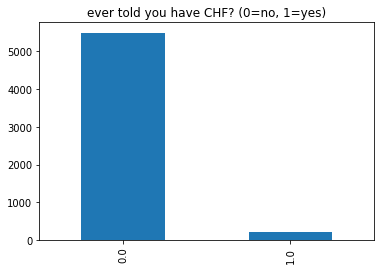

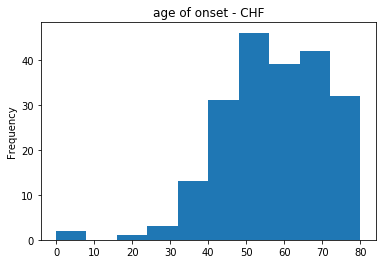

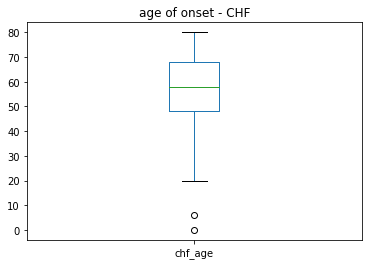

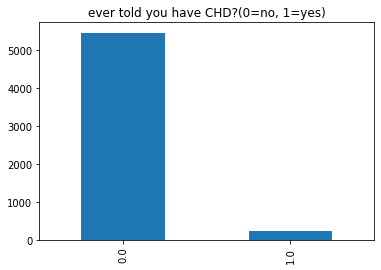

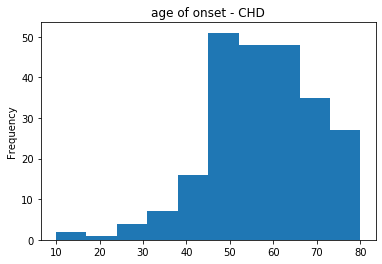

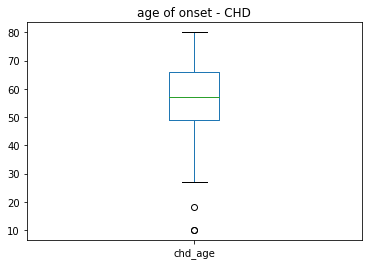

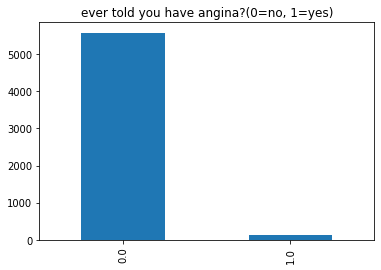

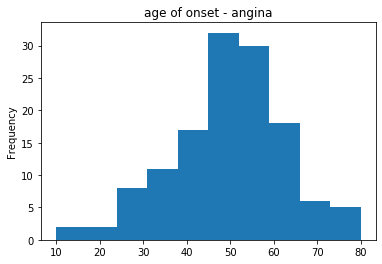

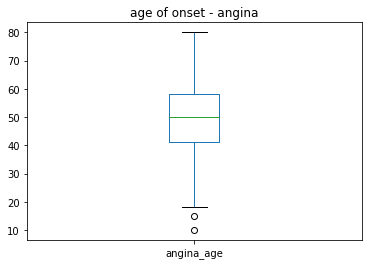

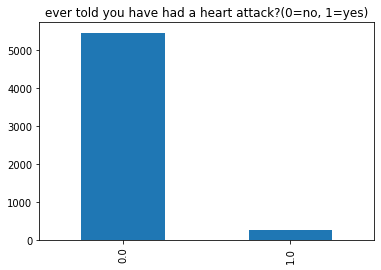

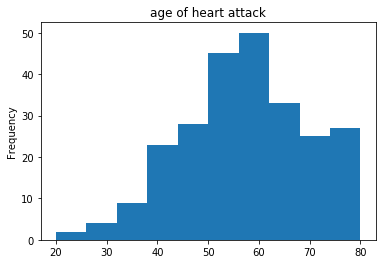

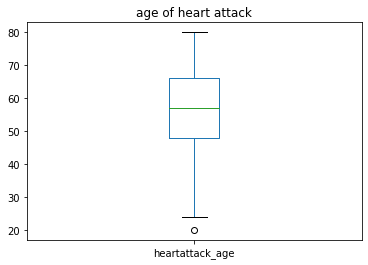

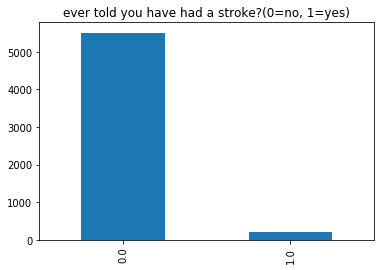

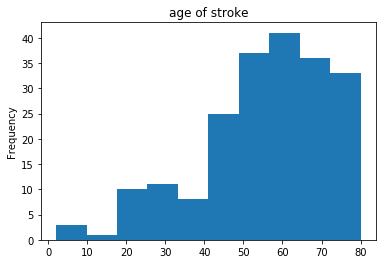

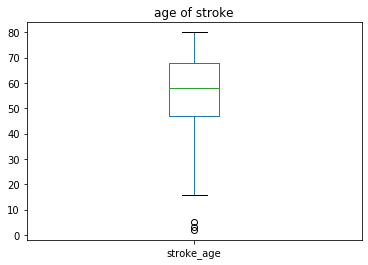

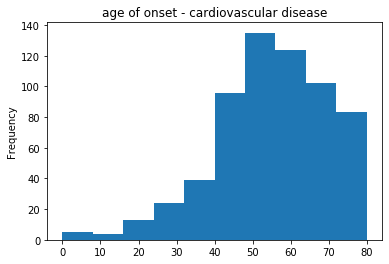

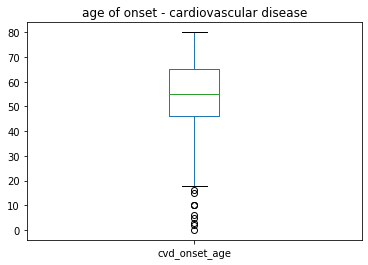

In [18]:
nhanes.diabetes.value_counts().plot(kind='bar', title='ever told you have Diabetes? (0=no, 1=yes)')
plt.show()
nhanes.diabetes_age.plot(kind='hist', title='age of onset - Diabetes')
plt.show()
nhanes.diabetes_age.plot(kind='box', title='age of onset - Diabetes')
plt.show()

nhanes.chf.value_counts().plot(kind='bar', title='ever told you have CHF? (0=no, 1=yes)')
plt.show()
nhanes.chf_age.plot(kind='hist', title='age of onset - CHF')
plt.show()
nhanes.chf_age.plot(kind='box', title='age of onset - CHF')
plt.show()

nhanes.chd.value_counts().plot(kind='bar', title='ever told you have CHD?(0=no, 1=yes)')
plt.show()
nhanes.chd_age.plot(kind='hist', title='age of onset - CHD')
plt.show()
nhanes.chd_age.plot(kind='box', title='age of onset - CHD')
plt.show()

nhanes.angina.value_counts().plot(kind='bar', title='ever told you have angina?(0=no, 1=yes)')
plt.show()
nhanes.angina_age.plot(kind='hist', title='age of onset - angina')
plt.show()
nhanes.angina_age.plot(kind='box', title='age of onset - angina')
plt.show()

nhanes.heartattack.value_counts().plot(kind='bar', title='ever told you have had a heart attack?(0=no, 1=yes)')
plt.show()
nhanes.heartattack_age.plot(kind='hist', title= 'age of heart attack')
plt.show()
nhanes.heartattack_age.plot(kind='box', title= 'age of heart attack')
plt.show()


nhanes.stroke.value_counts().plot(kind='bar', title='ever told you have had a stroke?(0=no, 1=yes)')
plt.show()
nhanes.stroke_age.plot(kind='hist', title= 'age of stroke')
plt.show()
nhanes.stroke_age.plot(kind='box', title= 'age of stroke')
plt.show()

nhanes.cvd_onset_age.plot(kind='hist', title= 'age of onset - cardiovascular disease')
plt.show()
nhanes.cvd_onset_age.plot(kind='box', title = 'age of onset - cardiovascular disease')
plt.show()



#### Distribution of  demographic/ethnicity, depression and food security data.

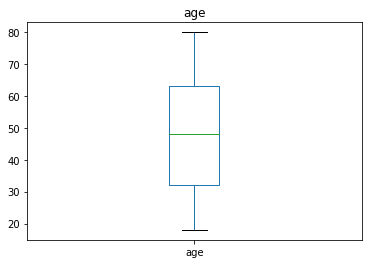

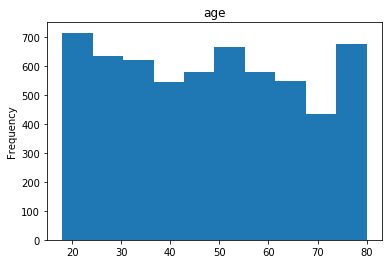

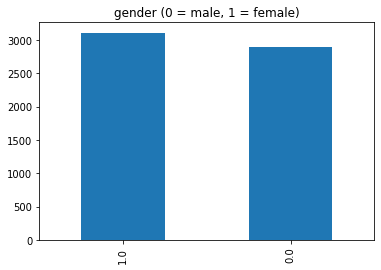

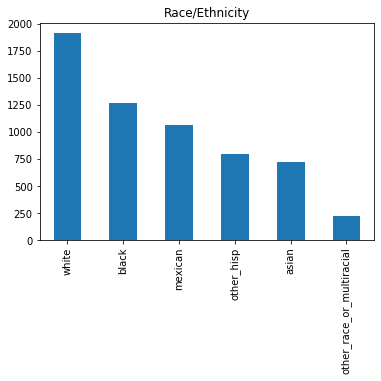

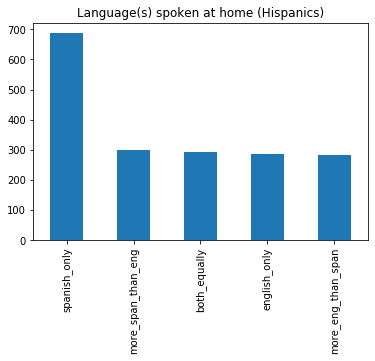

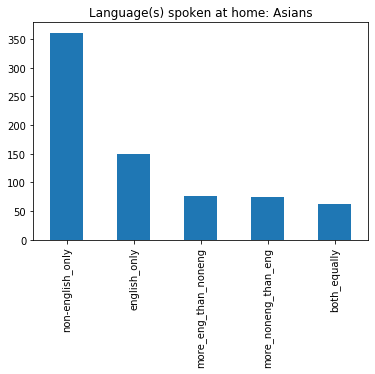

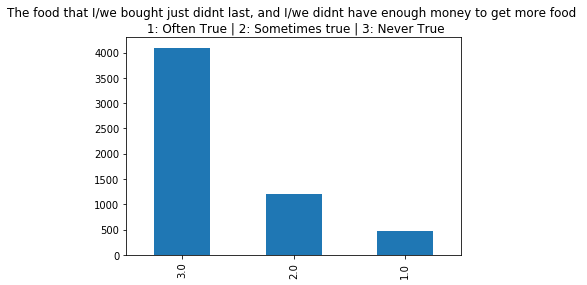

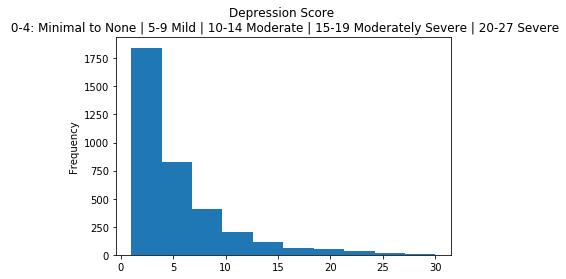

In [19]:
nhanes.age.plot(kind='box', title='age')
plt.show()
nhanes.age.plot(kind='hist', title='age')
plt.show()
nhanes.gender.value_counts().plot(kind='bar', title='gender (0 = male, 1 = female)')
plt.show()
nhanes.ethnicity.value_counts().plot(kind='bar', title='Race/Ethnicity')
plt.show()
nhanes.lang_hisp.value_counts().plot(kind='bar', title='Language(s) spoken at home (Hispanics)')
plt.show()
nhanes.lang_asian.value_counts().plot(kind='bar', title='Language(s) spoken at home: Asians')
plt.show()
nhanes.foodsec.value_counts().plot(kind='bar', title='The food that I/we bought just didn''t last, and I/we didn''t have enough money to get more food \n 1: Often True | 2: Sometimes true | 3: Never True')
plt.show()
nhanes.depr_score.plot(kind='hist', title='Depression Score \n 0-4: Minimal to None | 5-9 Mild | 10-14 Moderate | 15-19 Moderately Severe | 20-27 Severe')
plt.show()                        

#### Exploration of physical exam and laboratory data.

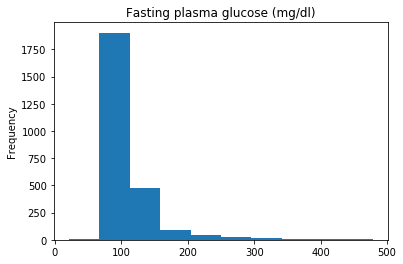

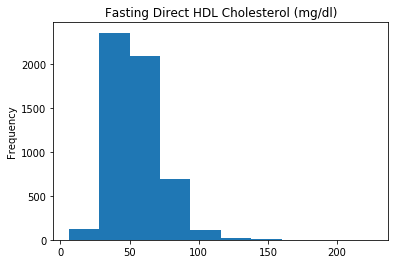

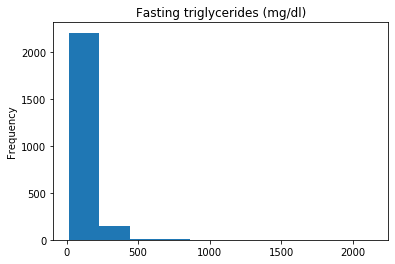

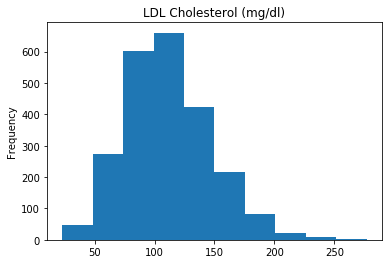

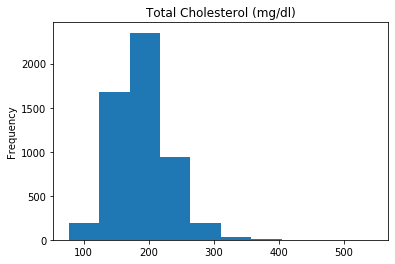

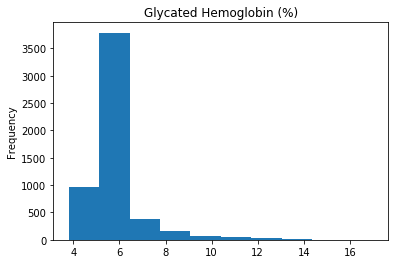

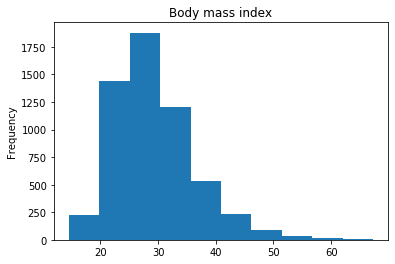

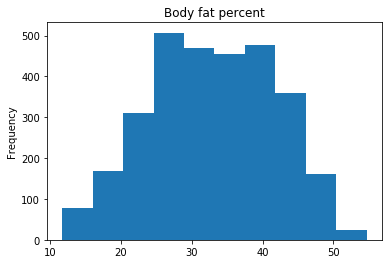

In [20]:
nhanes.glucose.plot(kind='hist', title="Fasting plasma glucose (mg/dl)")
plt.show()
nhanes.hdl.plot(kind='hist', title='Fasting Direct HDL Cholesterol (mg/dl)')
plt.show()
nhanes.tg.plot(kind='hist', title='Fasting triglycerides (mg/dl)')
plt.show()
nhanes.ldl.plot(kind='hist', title='LDL Cholesterol (mg/dl)')
plt.show()
nhanes.tchol.plot(kind='hist', title='Total Cholesterol (mg/dl)')
plt.show()
nhanes.hgba1c.plot(kind='hist', title='Glycated Hemoglobin (%)')
plt.show()
nhanes.bmi.plot(kind='hist', title='Body mass index')
plt.show()
nhanes.bodyfatpct.plot(kind='hist', title='Body fat percent')
plt.show()

#### Visualization of 'number of overnight hospital stays in last year'

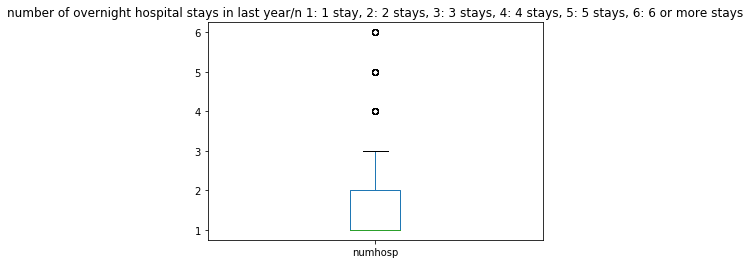

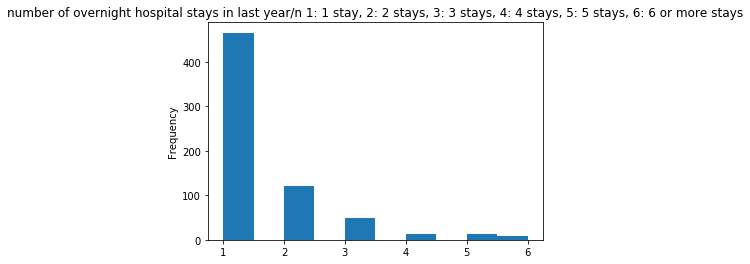

In [21]:
nhanes.numhosp.plot(kind='box', title='number of overnight hospital stays in last year/n 1: 1 stay, 2: 2 stays, 3: 3 stays, 4: 4 stays, 5: 5 stays, 6: 6 or more stays')
plt.show()
nhanes.numhosp.plot(kind='hist', title='number of overnight hospital stays in last year/n 1: 1 stay, 2: 2 stays, 3: 3 stays, 4: 4 stays, 5: 5 stays, 6: 6 or more stays')
plt.show()


### We determine that we should leave all outliers, since none of them were noticable errors.

### Last, the dataframe is saved to a csv file.

In [22]:
nhanes.to_csv('nhanes.csv', index=False)